# Predicting Employment of Students at an University Campus 
## Phase 2: Predictive Modeling
### Group 46
### Zhaojin Liu s3206722, Martin Thu s3494324, Klara Vickov s3873315

## Table of Contents
- [Introduction](#intro)
    - [Phase 1 Summary](#sum)
    - [Report Overview](#ro)
    - [Overview of Methodology](#om)
- [Predictive Modeling](#model)
    - [One-Hot Encoding and Scaling](#ohe)
    - [Feature Selection](#fs)
    - [Model Fitting & Tuning](#modelFittingTuning)
        - [Logistic Regression](#lr)
        - [K Nearest Neighbors](#knn)
        - [Decision Tree](#dt)
        - [Random Forest](#rf)
        - [Naive Bayes](#nb)
    - [Model Comparison](#mc)
- [Critique and Limitations](#cl)
- [Summary and Conclusions](#sc)
    - [Project Summary](#ps)
    - [Summary of Findings](#sf)
    - [Conclusions](#con)
- [References](#ref)

## Introduction <a id='intro'></a>

### Phase 1 Summary <a id='sum'></a>
During phase 1 of the project, we pre-processed, explored, and visualized our chosen dataset that looks at academic information of students at Jain University in India and determines whether they received placement after university or not. 

The pre-processing involved checking for missing/incorrect values, outliers, changing feature names, and dropping ID-like columns. Then, we separated our target feature, status, from the descriptive features.

For exploring and visualizing, we looked at various one-variable, two-variable, and three-variable graphs and plots to determine what kind of relationships exist between features. Some interesting takeaways from our explorations were that male students have a higher chance of received placement, students with higher undergraduate and postgraduate GPAs are more likely to be placed, and a higher employability test percentage leads to higher chances of getting placed. A literature review backed up some of this data by showing that GPA, gender, and previous work experience contribute to higher employability for graduates.

We will load the dataset that was used in phase 1 of the project.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) 

In [2]:
placement = pd.read_csv("placement_phase2.csv", sep = "\t", index_col = [0])
placement.head().style.set_precision(3)

,Gender,Secondary Education Percentage,Secondary Board of Education,Higher Secondary Education Percentage,Higher Secondary Board of Education,Higher Secondary Specialisation,Undergraduate Degree Percentage,Undergraduate Degree Type,Work Experience,Employability Test Percentage,Post Graduate Specialisation,MBA Grade Percentage,Status
1,M,67.000,Others,91.000,Others,Commerce,58.000,Sci&Tech,No,55.000,Mkt&HR,58.800,Placed
2,M,79.330,Central,78.330,Others,Science,77.480,Sci&Tech,Yes,86.500,Mkt&Fin,66.280,Placed
3,M,65.000,Central,68.000,Central,Arts,64.000,Comm&Mgmt,No,75.000,Mkt&Fin,57.800,Placed
4,M,56.000,Central,52.000,Central,Science,52.000,Sci&Tech,No,66.000,Mkt&HR,59.430,Not Placed
5,M,85.800,Central,73.600,Central,Commerce,73.300,Comm&Mgmt,No,96.800,Mkt&Fin,55.500,Placed


### Report Overview <a id='ro'></a>
For phase 2, we will begin by encoding categorical features, including the target feature, and scaling the necessary descriptive features. Then we will use feature selection to select the best descriptive features of the dataset. Next, we will fit K-Nearest Neighbors, Decision Tree, Random Forest, Linear Regression, and Naive Bayes models to our data, and compare the models to see which one is of best fit. Then we will critique our results before summarizing the whole project and drawing relevant conclusions.

### Overview of Methodology <a id='om'></a>
Before even beginning any predictive modeling, we will be one-hot encoding all categorical features and scaling the descriptive features to ensure the values are between 0 and 1. 

The first step of our predictive modeling will be to select the best performing features. The two methods we will use for feature selection are F-score method and spFSR. Once we have selected the appropriate features for each model, we will move on to model fitting and tuning.

To predict the target feature, status, we will be using 5 different models: K-Nearest Neighbors, Decision Tree, Random Forest, Linear Regression, and Naive Bayes. We first split the data into training and testing data using a 70:30 split. As our dataset is relatively small at 215 observations, we can use the whole dataset rather than a smaller sample. The scoring metric for each model evaluation will be accuracy to ensure uniformity amongst all models. 

Finally, model comparison will be done using paired t-tests to determine if the differences in model performance are statistically significant. This will also help us in determining whether there is one clear best-performing model.

## Predictive Modeling <a id='model'></a>

### One-Hot Encoding and Scaling <a id='ohe'></a>
Before doing any modeling or feature selection, we must encoded all categorical features into numerical features so they can be modeled.

First, we will separate the target feature, status, from the rest of the descriptive features.

In [3]:
Data = placement.drop(columns='Status')
target = placement['Status']

We will encode the target feature first. Those that are placed will be encoded as 1 and those that are not placed will be encoded as 0. One thing to keep in mind here is that the two target classes are not balanced, with twice as many placed ('1') values as not placed ('0') values.

In [4]:
target = pd.get_dummies(target, drop_first = True)
target.value_counts()

Placed
1         148
0          67
dtype: int64

Next we will encode all the categorical features.

Here we print the levels of each categorical variable. Gender, Secondary Board of Education, Higher Secondary Board of Education, Work Experience, Post Graduate Specialisation are two-level variables and will be encoded as 1 or 0 in one variable. On the other hand, Higher Secondary Specialisation and Undergraduate Degree Type are three-level variables and will be encoded into three separate variables.

In [5]:
for col in Data.columns[Data.dtypes==object]:
    print(col)
    print(Data[col].value_counts(), "\n")

Gender
M    139
F     76
Name: Gender, dtype: int64 

Secondary Board of Education
Central    116
Others      99
Name: Secondary Board of Education, dtype: int64 

Higher Secondary Board of Education
Others     131
Central     84
Name: Higher Secondary Board of Education, dtype: int64 

Higher Secondary Specialisation
Commerce    113
Science      91
Arts         11
Name: Higher Secondary Specialisation, dtype: int64 

Undergraduate Degree Type
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: Undergraduate Degree Type, dtype: int64 

Work Experience
No     141
Yes     74
Name: Work Experience, dtype: int64 

Post Graduate Specialisation
Mkt&Fin    120
Mkt&HR      95
Name: Post Graduate Specialisation, dtype: int64 



In [6]:
cat_cols = Data.columns[Data.dtypes==object].to_list()

In [7]:
for col in cat_cols:
    if (Data[col].nunique() == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)

Data = pd.get_dummies(Data)

Below we can see that all the value have been properly encoded into 1 and 0. For Gender, Male is 1 and Female is 0. For Secondary Board of Education, Central is 1 and Others is 0. For Higher Secondary Board of Education, Others is 1 and Central is 0. For Work Experience, Yes is 1 and No is 0. For Post Graduate Specialisation, Mkt&Fin is 1 and Mkt&HR is 0.

In [8]:
for col in Data.columns:
    if Data[col].nunique() == 2 or Data[col].nunique() == 3:
        print(col)
        print(Data[col].value_counts(), "\n")

Gender
1    139
0     76
Name: Gender, dtype: int64 

Secondary Board of Education
0    116
1     99
Name: Secondary Board of Education, dtype: int64 

Higher Secondary Board of Education
1    131
0     84
Name: Higher Secondary Board of Education, dtype: int64 

Work Experience
0    141
1     74
Name: Work Experience, dtype: int64 

Post Graduate Specialisation
0    120
1     95
Name: Post Graduate Specialisation, dtype: int64 

Higher Secondary Specialisation_Arts
0    204
1     11
Name: Higher Secondary Specialisation_Arts, dtype: int64 

Higher Secondary Specialisation_Commerce
1    113
0    102
Name: Higher Secondary Specialisation_Commerce, dtype: int64 

Higher Secondary Specialisation_Science
0    124
1     91
Name: Higher Secondary Specialisation_Science, dtype: int64 

Undergraduate Degree Type_Comm&Mgmt
1    145
0     70
Name: Undergraduate Degree Type_Comm&Mgmt, dtype: int64 

Undergraduate Degree Type_Others
0    204
1     11
Name: Undergraduate Degree Type_Others, dtype: 

Now that the data is encoded, we will scale the descriptive features, so they are within the range of 0 to 1 to ensure equal weighting. We will store the column names as they will be needed to build up the new data frame with scaled features. Scaling will produce a NumPy array which does not include column names.

In [9]:
col_names = Data.columns

In [10]:
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler()
Data_scaled = data_scaler.fit_transform(Data)

We put the dataset back together using the NumPy array and the previously stored column names. We can see below that the features previously labeled 1 and 0 have stayed that way, and all other features now have values between 1 and 0.

In [11]:
Data_scaled = pd.DataFrame(Data_scaled, columns = col_names)
Data_scaled.sample(5, random_state = 999).style.set_precision(3)

,Gender,Secondary Education Percentage,Secondary Board of Education,Higher Secondary Education Percentage,Higher Secondary Board of Education,Undergraduate Degree Percentage,Work Experience,Employability Test Percentage,Post Graduate Specialisation,MBA Grade Percentage,Higher Secondary Specialisation_Arts,Higher Secondary Specialisation_Commerce,Higher Secondary Specialisation_Science,Undergraduate Degree Type_Comm&Mgmt,Undergraduate Degree Type_Others,Undergraduate Degree Type_Sci&Tech
148,0.000,0.744,0.000,0.807,0.000,0.146,0.000,0.146,0.000,0.482,1.000,0.000,0.000,0.000,1.000,0.000
191,1.000,0.538,1.000,0.395,0.000,0.537,0.000,0.458,0.000,0.367,0.000,0.000,1.000,1.000,0.000,0.000
125,0.000,0.889,0.000,0.593,0.000,0.561,0.000,0.521,0.000,0.829,0.000,1.000,0.000,1.000,0.000,0.000
68,0.000,0.594,0.000,0.165,0.000,0.554,0.000,0.604,1.000,0.301,0.000,1.000,0.000,0.000,0.000,1.000
187,1.000,0.775,0.000,0.470,0.000,0.415,1.000,0.938,0.000,0.512,0.000,0.000,1.000,0.000,0.000,1.000


To be certain that scaling has been done properly, we print out a summary of all columns. The min value is 0 and max value is 1 for each column, so scaling has been successful. 

In [12]:
Data_scaled.describe().style.set_precision(3)

,Gender,Secondary Education Percentage,Secondary Board of Education,Higher Secondary Education Percentage,Higher Secondary Board of Education,Undergraduate Degree Percentage,Work Experience,Employability Test Percentage,Post Graduate Specialisation,MBA Grade Percentage,Higher Secondary Specialisation_Arts,Higher Secondary Specialisation_Commerce,Higher Secondary Specialisation_Science,Undergraduate Degree Type_Comm&Mgmt,Undergraduate Degree Type_Others,Undergraduate Degree Type_Sci&Tech
count,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000,215.000
mean,0.647,0.544,0.460,0.483,0.609,0.399,0.344,0.460,0.442,0.415,0.051,0.526,0.423,0.674,0.051,0.274
std,0.479,0.223,0.500,0.180,0.489,0.179,0.476,0.277,0.498,0.219,0.221,0.501,0.495,0.470,0.221,0.447
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.406,0.000,0.394,0.000,0.268,0.000,0.208,0.000,0.252,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,0.538,0.000,0.461,1.000,0.390,0.000,0.438,0.000,0.404,0.000,1.000,0.000,1.000,0.000,0.000
75%,1.000,0.718,1.000,0.593,1.000,0.537,1.000,0.698,1.000,0.564,0.000,1.000,1.000,1.000,0.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### Feature Selection <a id='fs'></a>

 #### KNN Model

For feature selection of the KNN model, we will use the f-score method to compare each descriptive feature with the target feature using F-distribution. 

First, we will assess the performance of the full set of features using repeat stratified k-folds with 3 repeats and accuracy as our scoring metric. K-folds is used as the dataset is quite small (212 variables) which is not enough for hold-out sampling.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn import feature_selection as fs

In [14]:
KNN_model = KNeighborsClassifier()
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=999)

In [15]:
scoring_metric = 'accuracy'

In [16]:
cv_results_full = cross_val_score(estimator=KNN_model,
                             X=Data,
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)

In [17]:
cv_results_full

array([0.8372093 , 0.76744186, 0.81395349, 0.93023256, 0.86046512,
       0.81395349, 0.90697674, 0.8372093 , 0.8372093 , 0.81395349,
       0.88372093, 0.81395349, 0.88372093, 0.8372093 , 0.76744186])

In [18]:
cv_results_full.mean().round(3)

0.84

This gives 84% accuracy using the full set of features, which is the number of correct predictions divided by the full set of predictions.

Next, we will select various numbers of features and determine if they give a higher accuracy than using all features.

In [19]:
num_features = 5

In [20]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data_scaled, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]

Starting with 5 features, the most important feature is Secondary Education Percentage. The first three features have a much higher importance (over 60%) than the other 2 features. This may indicate that having just 3 features selected is adequate for modeling.

In [21]:
best_features_fscore = Data_scaled.columns[fs_indices_fscore].values
best_features_fscore

array(['Secondary Education Percentage',
       'Higher Secondary Education Percentage',
       'Undergraduate Degree Percentage', 'Work Experience',
       'Post Graduate Specialisation'], dtype=object)

In [22]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([124.84250634,  67.74518757,  63.71917614,  17.57165962,
        14.27951129])

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

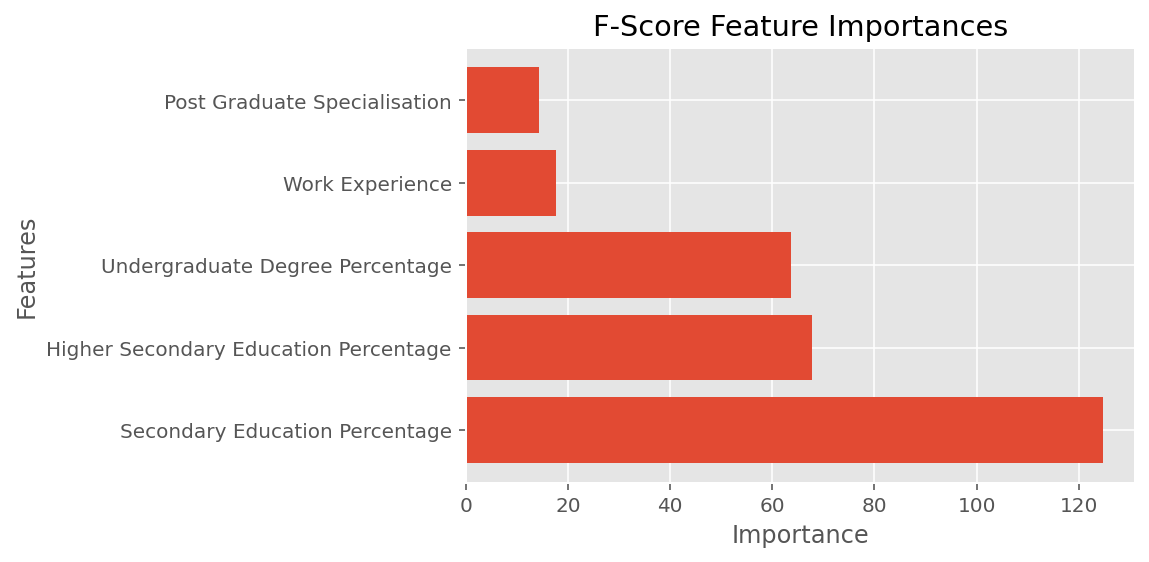

In [24]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

The data is transformed from a pandas data frame to a numpy array as accuracy cross-validation only works on a numpy array.

In [25]:
D1= pd.DataFrame(Data_scaled).to_numpy()
type(D1)

numpy.ndarray

In [26]:
D1[:, fs_indices_fscore].shape

(215, 5)

Five selected features gives 84.5% accuracy.

In [27]:
cv_results_fscore = cross_val_score(estimator=KNN_model,
                             X=D1[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_fscore.mean().round(3)

0.845

We try feature selection again, this time with only 3 features. 

In [28]:
num_features = 3

In [29]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data_scaled, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]

In [30]:
best_features_fscore = Data_scaled.columns[fs_indices_fscore].values
best_features_fscore

array(['Secondary Education Percentage',
       'Higher Secondary Education Percentage',
       'Undergraduate Degree Percentage'], dtype=object)

In [31]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([124.84250634,  67.74518757,  63.71917614])

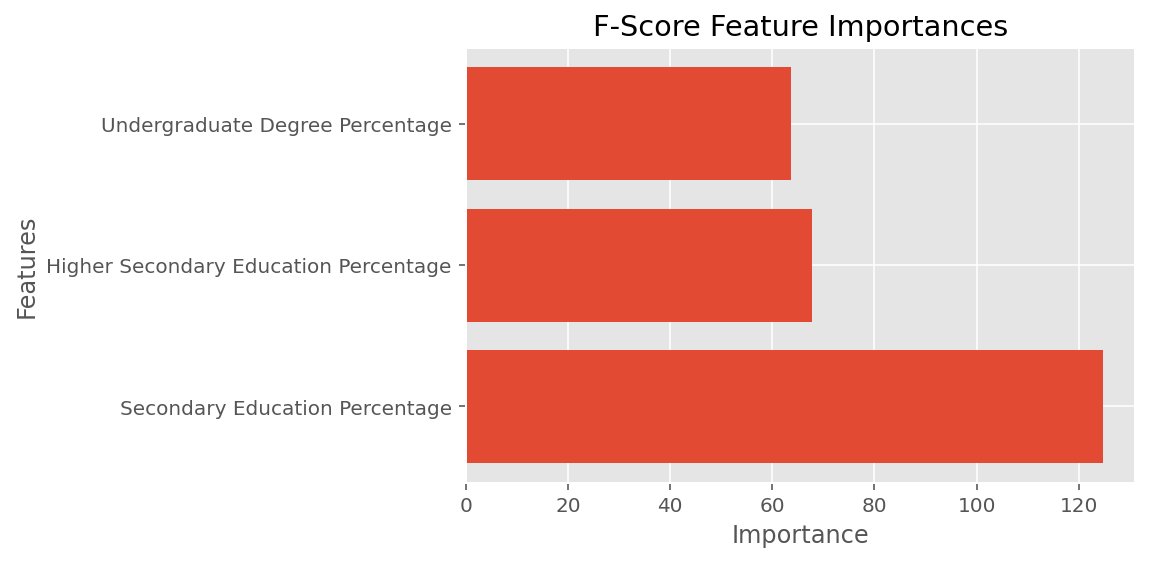

In [32]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

This results in an accuracy of 85.3%, which is slightly higher than both full feature selection and 5 feature selection. 4 feature selection gives 84% accuracy, 6 feature selection gives 80.8% accuracy and 7 feature selection gives 79.8% accuracy. These are not shown for conciseness. So, for the KNN model, we will be using only 3 features: Secondary Education Percentage, Higher Secondary Education Percentage, and Undergraduate Degree Percentage.

In [33]:
cv_results_fscore = cross_val_score(estimator=KNN_model,
                             X=D1[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_fscore.mean().round(3)

0.853

In [ ]:
## Model Fitting & Tuning <a id='lr'></a>

### Logistic Regression <a id='lr'></a>

From feature selection, 3 features, Secondary Education Percentage, Higher Secondary Education Percentage, and Undergraduate Degree Percentage, were chosen as the most important features and they will be used in the KNN model below. First, we create a new data frame, Data_fs, that consists of just the three columns mentioned above.

In [34]:
Data_fs = Data_scaled[['Secondary Education Percentage', 'Higher Secondary Education Percentage', 'Undergraduate Degree Percentage']]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data_fs, target, test_size =0.3,
                                                   stratify=target, random_state=999)

In [36]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(random_state=999)
logisticRegr.fit(X_train,y_train)
y_pred = logisticRegr.predict(X_test)

Use the test dataset to find out the accuracy

In [37]:
print("Accuracy:",logisticRegr.score(X_test, y_test))


Accuracy: 0.8461538461538461


Predefine the parameter

In [38]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

Use sklearn GridSearchCV to find out the best parameter 

In [39]:
clf = GridSearchCV(logisticRegr,
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=999),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [40]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)


Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8466666666666667


With GridSearchCV the accuracy is improved to 0.876

In [41]:
logreg = LogisticRegression(C = 1.0, 
                            penalty = 'l2', 
                            solver = 'liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))

Accuracy: 0.8769230769230769


### K Nearest Neighbors <a id='knn'></a>


From feature selection, 3 features, Secondary Education Percentage, Higher Secondary Education Percentage, and Undergraduate Degree Percentage, were chosen as the most important features and they will be used in the KNN model below. First, we create a new data frame, Data_fs, that consists of just the three columns mentioned above.

In [42]:
Data_fs = Data_scaled[['Secondary Education Percentage', 'Higher Secondary Education Percentage', 'Undergraduate Degree Percentage']]

Then we set the train test split for the model with 70% for testing and 30% for training. Stratify parameter is set to target as the target class is unbalanced, with twice as many 1 values as 0 values. By having it stratified, the proportion of 1s and 0s will stay the same even after the data is split into training and testing.

In [43]:
from sklearn.model_selection import train_test_split
D_train, D_test, t_train, t_test = train_test_split(Data_fs, target, test_size =0.3,
                                                   stratify=target, random_state=999)

There are two parameters we can adjust in the KNN classifier model, n_neighbors and p value. We will test out a wide range of n_neighbors (from 1 to 13) to determine which has the best performance. Worth noting is that only 10 neighbors were initially tested and the best performer was k=2. So, a few additional k values were added to be sure that we were capturing the most accurate model. Additionally, we will use both Manhattan distance (p=1) and Euclidean distance (p=2) as the p-values.

In [44]:
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
              'p': [1, 2]}

In [45]:
from sklearn.model_selection import GridSearchCV

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,
                      scoring='accuracy', 
                      return_train_score=True)

In [46]:
gs_KNN.fit(Data_fs, target);

Fitting 15 folds for each of 26 candidates, totalling 390 fits


The best parameters for the model are found to be k = 11 neighbors and p = 2 Euclidean distance. The accuracy of these two parameters is 85.9%.

In [47]:
gs_KNN.best_params_

{'n_neighbors': 11, 'p': 2}

In [48]:
gs_KNN.best_score_.round(3)

0.859

In [49]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2], ["Manhattan", "Euclidean"])

The results of the hyper-parameter tuning are shown in the plot below. k = 11 has the highest accuracy for both Manhattan and Euclidean models and k = 2 has the lowest accuracy for both models.

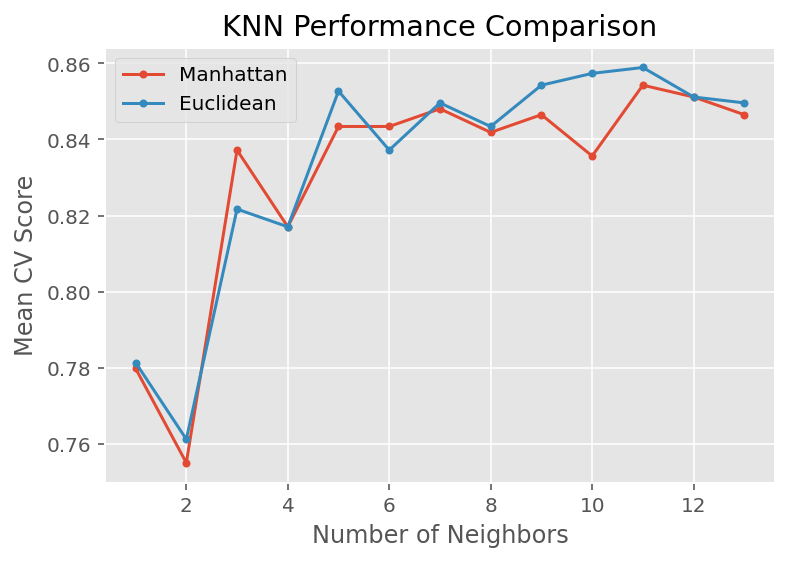

In [50]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

### Decision Tree <a id='dt'></a>

In [146]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 999)

In [147]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits = 5,
                                   n_repeats = 3,
                                   random_state = 999)

In [148]:
scoring_metric = 'accuracy'

In [149]:
cv_results_full = cross_val_score(estimator = clf,
                                 X = Data,
                                 y = target,
                                 cv = cv_method,
                                 scoring = scoring_metric)
cv_results_full

array([0.79069767, 0.76744186, 0.76744186, 0.74418605, 0.86046512,
       0.79069767, 0.81395349, 0.72093023, 0.76744186, 0.81395349,
       0.81395349, 0.74418605, 0.79069767, 0.74418605, 0.76744186])

In [150]:
cv_results_full.mean().round(3)

0.78

In [151]:
num_features = 5

In [152]:
from sklearn import feature_selection as fs
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
fs_indices_fscore

array([1, 3, 5, 6, 8], dtype=int64)

In [153]:
best_features_fscore = Data_scaled.columns[fs_indices_fscore].values
best_features_fscore

array(['Secondary Education Percentage',
       'Higher Secondary Education Percentage',
       'Undergraduate Degree Percentage', 'Work Experience',
       'Post Graduate Specialisation'], dtype=object)

In [154]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([124.84250634,  67.74518757,  63.71917614,  17.57165962,
        14.27951129])

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

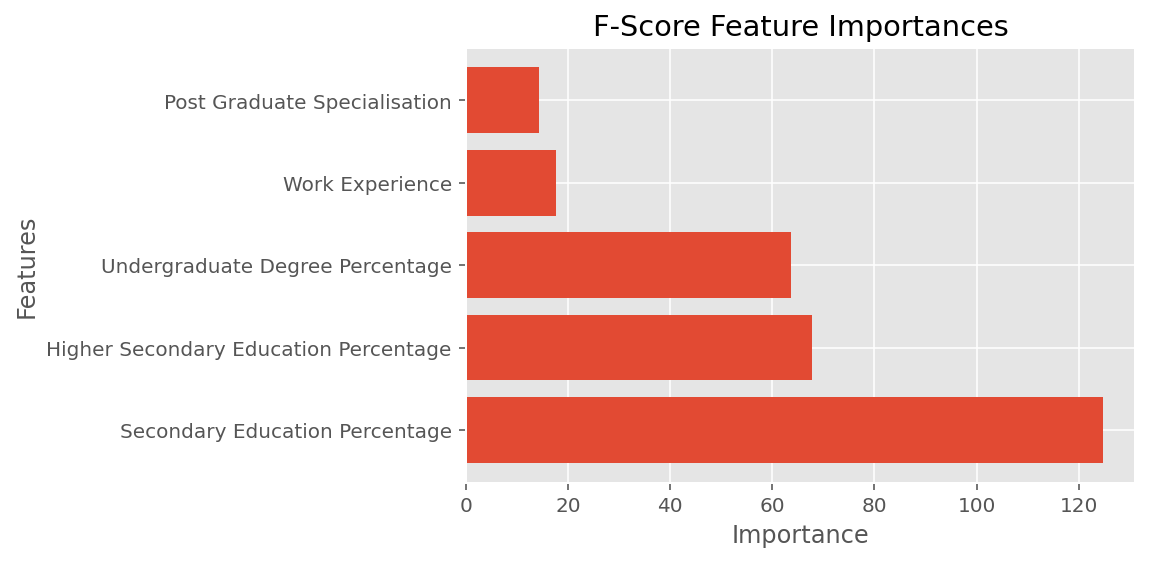

In [156]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

In [158]:
Df_numpy = pd.DataFrame(Data_scaled).to_numpy()
Df_numpy[:, fs_indices_fscore].shape

(215, 5)

From the observation of the F-score, it can be seen that Work Experience and Undergrade Degree percentage importantance is less than 20. However, to prevent underfitting the model the 5 features will be kept.

In [159]:
cv_results_fscore = cross_val_score(estimator=clf,
                             X=Df_numpy[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_fscore.mean().round(3)

0.788

### DT fit and tuning

In [161]:
data_DT_fs = Data_scaled[['Work Experience', 'Undergraduate Degree Percentage','Post Graduate Specialisation',
                          'Higher Secondary Education Percentage', 'Secondary Education Percentage']]

In [162]:
from sklearn.model_selection import train_test_split
D_train, D_test, t_train, t_test = train_test_split(data_DT_fs, target, test_size =0.3,stratify=target, random_state=999)

In [163]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=4,
                                       criterion='entropy',
                                       random_state = 999)

In [164]:
dt_classifier.fit(D_train, t_train);

In [165]:
dt_classifier.score(D_test, t_test)

0.7076923076923077

The decision tree predicts the correct labels on the test set with an accuracy rate of 70.76%

In [167]:
from sklearn.model_selection import GridSearchCV
df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6,7,8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(data_DT_fs, target);

Fitting 15 folds for each of 32 candidates, totalling 480 fits


In [168]:
gs_DT.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [169]:
gs_DT.best_score_.round(3)

0.825

In [170]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

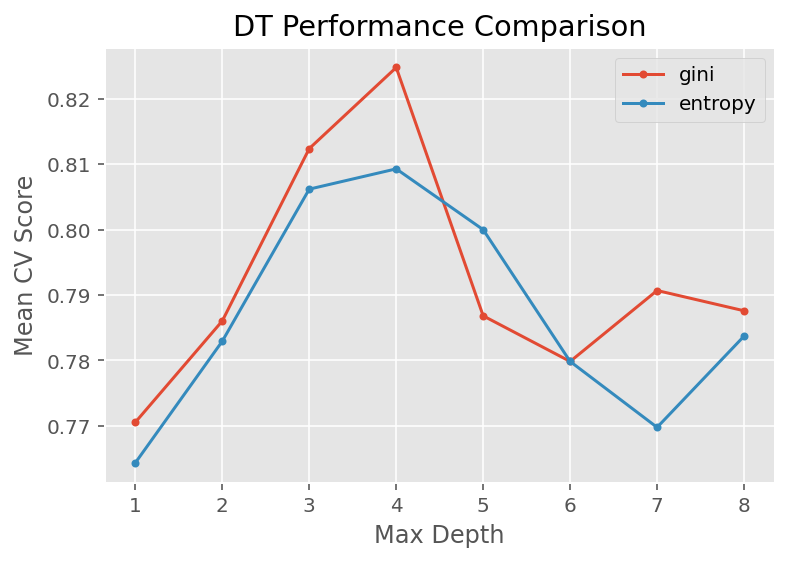

In [171]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

It is observed that the best set of hyperparameters as follows: Gini split criterion with maximum depth of 4 with
min_sample_split value of 2

### Random Forest <a id='rf'></a>

Using the selected features from Decision tree modeling:

In [173]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, random_state = 999)

In [174]:
rf_classifier.fit(D_train, t_train);

In [175]:
rf_classifier.score(D_test, t_test)

0.8461538461538461

In [176]:
param_rf = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4,5,6,7,8],
    'max_features': [2, 3],
    'min_samples_leaf': [5],
    'min_samples_split': [2],
    'n_estimators': [20]
}

Explicitly specify combinations to analyse the hyper parameters. Depth was set from 1 incrementing towards 8 to define the longest path between the root node and leaf note. The max features were set to 2-3 provided to each tree, minimum number of samples present in each node after splitting was set at 5, minimum required of observations in any given node was set at 2 in order to split and number of trees was set at 20.


In [177]:
gs_rf = GridSearchCV(estimator = rf_classifier, param_grid = param_rf, 
                          cv = cv_method, verbose = 1,scoring='accuracy')

In [178]:
gs_rf.fit(D_train, t_train)

Fitting 15 folds for each of 32 candidates, totalling 480 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=RandomForestClassifier(n_estimators=20,
                                              random_state=999),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': [2, 3], 'min_samples_leaf': [5],
                         'min_samples_split': [2], 'n_estimators': [20]},
             scoring='accuracy', verbose=1)

In [180]:
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 20}

In [181]:
gs_rf.best_score_.round(3)

0.862

In [182]:
results_rf = pd.DataFrame(gs_rf.cv_results_['params'])
results_rf['test_score'] = gs_rf.cv_results_['mean_test_score']
results_rf.columns

Index(['criterion', 'max_depth', 'max_features', 'min_samples_leaf',
       'min_samples_split', 'n_estimators', 'test_score'],
      dtype='object')

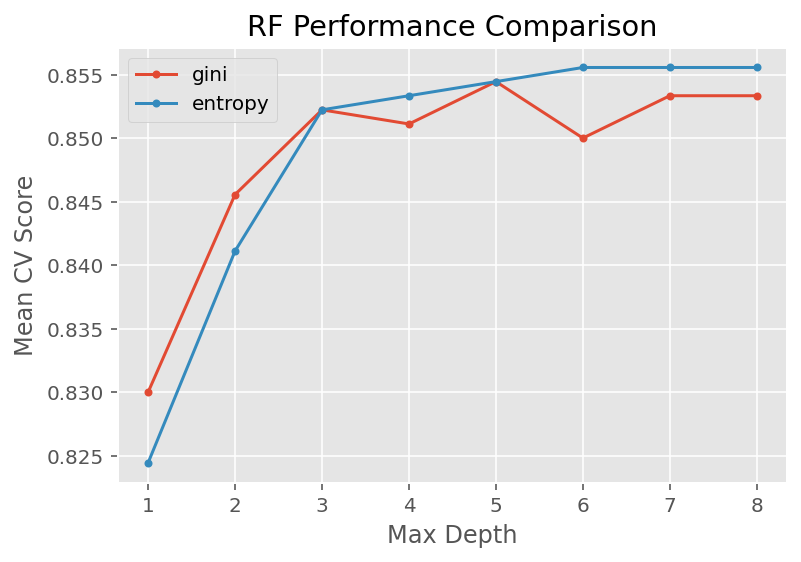

In [183]:
for i in ['gini', 'entropy']:
    temp = results_rf[results_rf['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("RF Performance Comparison")
plt.show()

The highest accuracy can be seen at depth 6 for entrophy while gini highest accuracy occurs at depth 5

### Naive Bayes <a id='nb'></a>

For Naive Bayes we are going to use SpFSR for feature selection

In [51]:
from spFSR import SpFSR
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
num_features = 5
sp_engine = SpFSR(x=D1, y=target, pred_type='c', wrapper=gnb, scoring='accuracy')
np.random.seed(999)


In [52]:
sp_output = sp_engine.run(num_features=num_features).results
fs_indices_spfsr = sp_output.get('selected_features')
fs_indices_spfsr


SpFSR-INFO: Wrapper: GaussianNB()
SpFSR-INFO: Hot start: True
SpFSR-INFO: Hot start range: 0.2
SpFSR-INFO: Feature weighting: False
SpFSR-INFO: Scoring metric: accuracy
SpFSR-INFO: Number of jobs: 1
SpFSR-INFO: Number of observations in the dataset: 215
SpFSR-INFO: Number of observations used: 215
SpFSR-INFO: Number of features available: 16
SpFSR-INFO: Number of features to select: 5
SpFSR-INFO: iter_no: 0, num_ft: 5, value: 0.819, st_dev: 0.039, best: 0.819 @ iter_no 0
SpFSR-INFO: iter_no: 10, num_ft: 5, value: 0.828, st_dev: 0.04, best: 0.843 @ iter_no 6
SpFSR-INFO: ===> iter_no: 10, same feature stall limit reached, initializing search...
SpFSR-INFO: iter_no: 20, num_ft: 5, value: 0.845, st_dev: 0.051, best: 0.845 @ iter_no 12
SpFSR-INFO: ===> iter_no: 25, same feature stall limit reached, initializing search...
SpFSR-INFO: iter_no: 30, num_ft: 5, value: 0.817, st_dev: 0.05, best: 0.845 @ iter_no 12
SpFSR-INFO: ===> iter_no: 35, same feature stall limit reached, initializing search

[1, 5, 0, 3, 2]

In [53]:
fs_indices_spfsr = sp_output.get('selected_features')
fs_indices_spfsr


[1, 5, 0, 3, 2]

In [54]:
best_features_spfsr = placement.columns[fs_indices_spfsr]
best_features_spfsr


Index(['Secondary Education Percentage', 'Higher Secondary Specialisation',
       'Gender', 'Higher Secondary Education Percentage',
       'Secondary Board of Education'],
      dtype='object')

In [55]:
feature_importances_spfsr = sp_output.get('selected_ft_importance')
feature_importances_spfsr


array([ 2.02987257e-01,  8.54909397e-02,  7.17493013e-02,  3.09701732e-02,
       -2.00105609e-04])

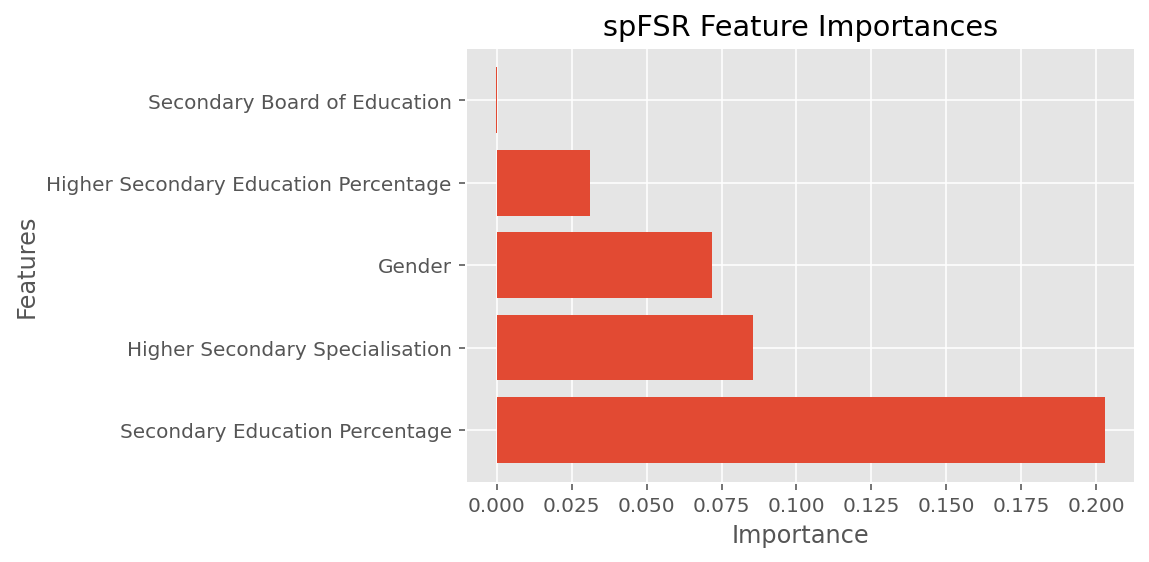

In [56]:
plot_imp(best_features_spfsr, feature_importances_spfsr, 'spFSR')


In [57]:
cv_results_spfsr = cross_val_score(estimator=gnb,
                             X=D1[:, fs_indices_spfsr],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_spfsr.mean().round(3)

0.856

In [58]:
print('Full Set of Features:', cv_results_full.mean().round(3))
print('F-Score:', cv_results_fscore.mean().round(3))
print('spFSR:', cv_results_spfsr.mean().round(3)) 

Full Set of Features: 0.84
F-Score: 0.853
spFSR: 0.856


spFSR feature selection can produce the best accuracy. The top three features are 'Secondary Education Percentage', 'Higher Secondary Education Percentage', 'Gender'. We are going to use these features to train our Naive Bayes model.

In [59]:
Data_fs = Data_scaled[['Secondary Education Percentage', 'Higher Secondary Education Percentage', 'Gender']]

Gaussian Naive Bayes assumes that each one of the descriptive features follows a Gaussian, that is, normal distribution. This is highly unlikely in practice, but we can perform what is called a "power transformation" on each feature to make it more or less normally distributed

In [60]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

np.random.seed(999)

sample_size = 1000
x_exponential = np.random.exponential(2, sample_size).reshape(-1, 1)
x_transformed = PowerTransformer().fit_transform(x_exponential)

df1 = pd.DataFrame(x_exponential)
df1['distribution'] = 'exponential'

df2 = pd.DataFrame(x_transformed)
df2['distribution'] = 'transformed'

# combine the two data frames into one to be used for plotting
df = pd.concat([df1, df2], axis=0)
df.rename(columns={0: 'x'}, inplace=True)

print(df.sample(n=10))

            x distribution
342 -0.276524  transformed
321  3.216755  exponential
247  1.297923  transformed
514 -1.678249  transformed
343  0.204341  exponential
386  0.486638  exponential
304  0.883091  exponential
772  0.015391  exponential
889  0.184597  transformed
554  0.076667  exponential


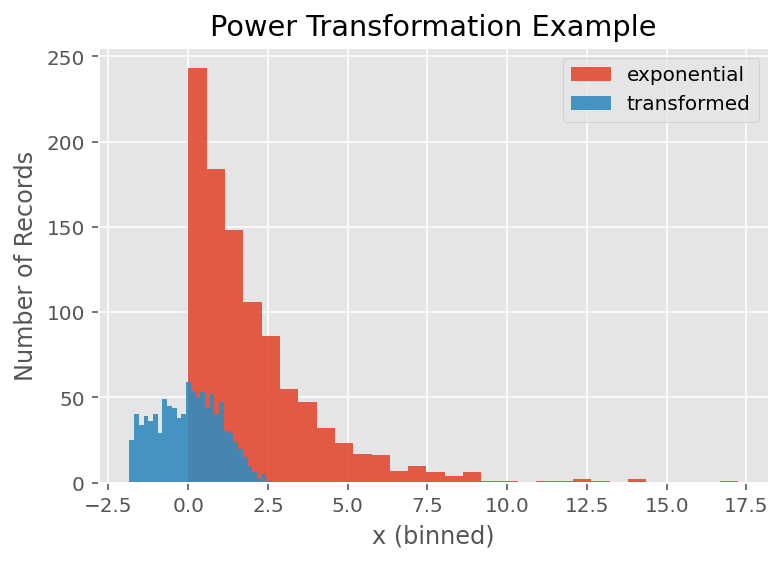

In [61]:
for i in ['exponential', 'transformed']:
    temp = df[df['distribution']==i]
    plt.hist(temp['x'], alpha = 0.9, bins =30, label = i)

plt.xlabel('x (binned)')
plt.ylabel('Number of Records')
plt.title('Power Transformation Example')
plt.legend()
plt.show()

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(D1)

gs_NB.fit(Data_transformed, target);


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


The parameter to achieve the best result is var_smoothing: 0.1

In [63]:
gs_NB.best_params_


{'var_smoothing': 0.1}

In [64]:
gs_NB.best_score_


0.8263565891472867

In [65]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']


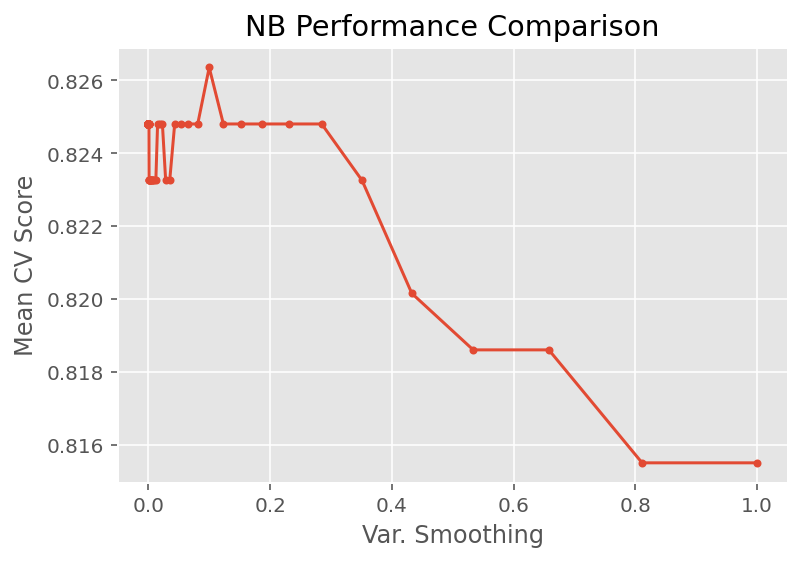

In [66]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

We observe that the best variance smoothing parameter for NB is around 0.1, though the difference between other values in terms of the mean CV score is very small per the range of the y-axis.

### Model Comparison <a id='mc'></a>

In [67]:
    import matplotlib.pyplot as plt
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt

    plt.style.use('ggplot')

Append algorithm with best tunning parameters

In [68]:
    X = Data_scaled
    y = target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

    models = []
    models.append(('LogisticRegression', LogisticRegression(
                            C = 1.0, 
                            penalty = 'l2', 
                            solver = 'liblinear')))
    models.append(('KNN', KNeighborsClassifier(n_neighbors = 11, p = 2)))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier(
                            criterion = 'gini', 
                            max_depth = 4, 
                            min_samples_split = 2)))
    models.append(('RandomForestClassifier', RandomForestClassifier(
                            criterion = 'entropy',
                            max_depth = 6,
                            max_features = 3,
                            min_samples_leaf = 5,
                            min_samples_split = 2,
                            n_estimators = 20)))
    models.append(('NaiveBayes', GaussianNB(var_smoothing = 0.1)))


Calculate and print the accuracy result

In [69]:
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

LogisticRegression: 0.820000 (0.046825)
KNN: 0.724444 (0.052305)
DecisionTreeClassifier: 0.795556 (0.069779)
RandomForestClassifier: 0.815556 (0.060696)
NaiveBayes: 0.808889 (0.060205)


Display the result in a plot chart for visual presentation

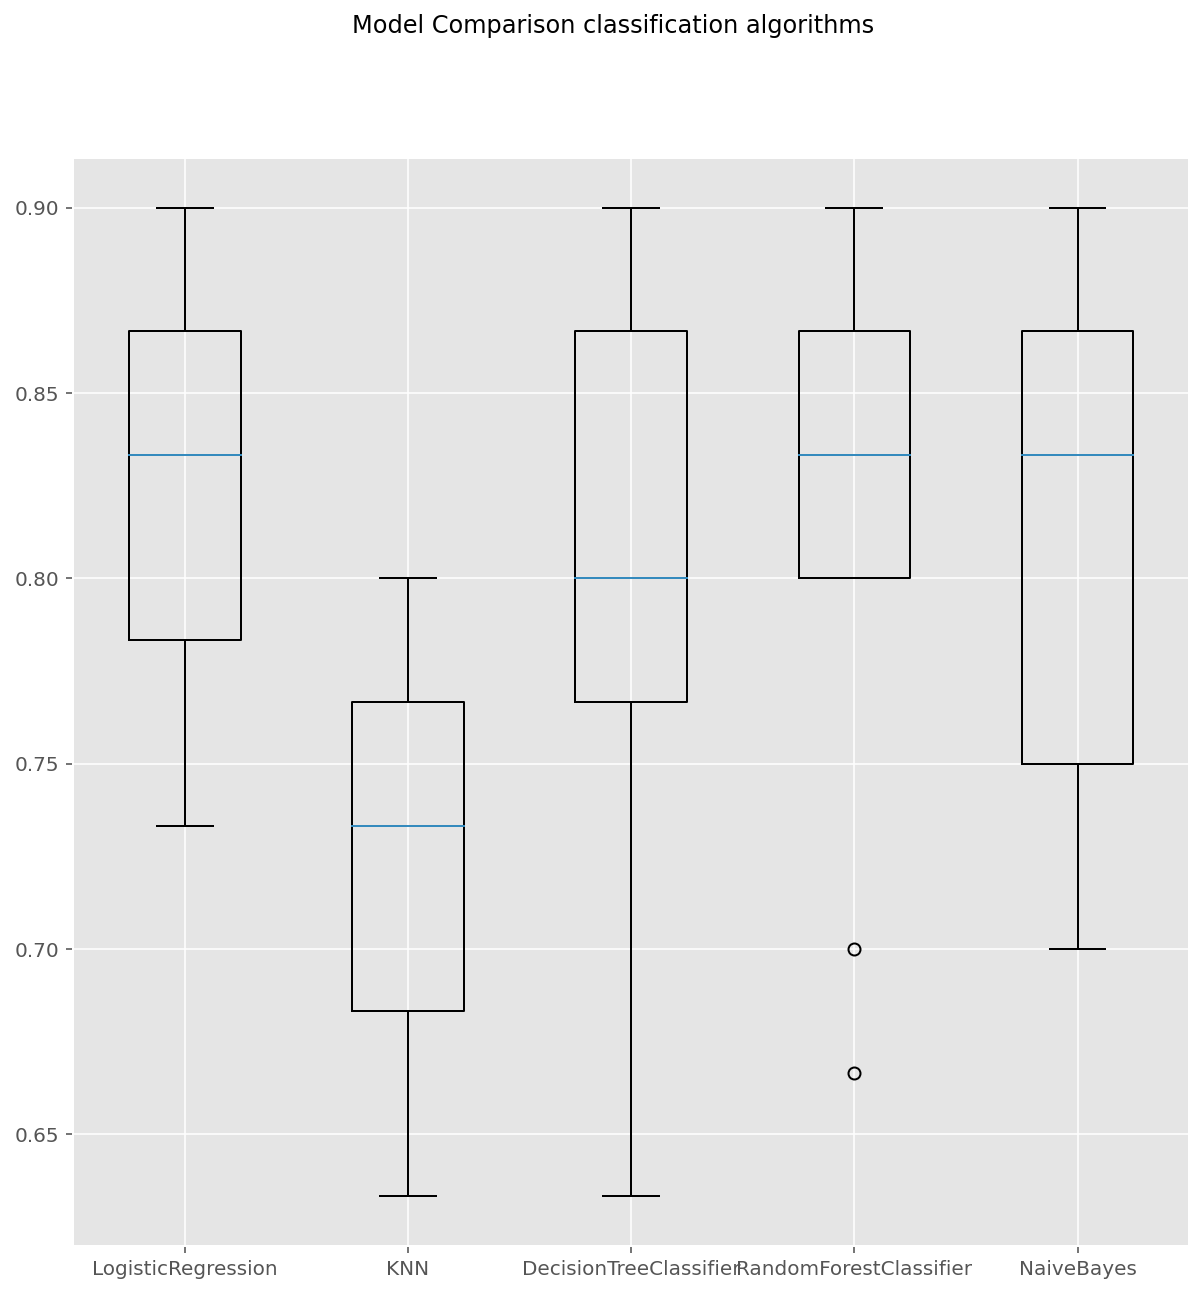

In [70]:
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('Model Comparison classification algorithms')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [71]:
results

[array([0.83333333, 0.8       , 0.76666667, 0.86666667, 0.83333333,
        0.76666667, 0.8       , 0.73333333, 0.86666667, 0.9       ,
        0.76666667, 0.86666667, 0.8       , 0.83333333, 0.86666667]),
 array([0.66666667, 0.76666667, 0.76666667, 0.73333333, 0.63333333,
        0.66666667, 0.73333333, 0.7       , 0.73333333, 0.8       ,
        0.73333333, 0.73333333, 0.63333333, 0.8       , 0.76666667]),
 array([0.7       , 0.73333333, 0.76666667, 0.8       , 0.86666667,
        0.76666667, 0.8       , 0.86666667, 0.86666667, 0.8       ,
        0.8       , 0.86666667, 0.63333333, 0.76666667, 0.9       ]),
 array([0.66666667, 0.86666667, 0.83333333, 0.83333333, 0.86666667,
        0.7       , 0.83333333, 0.86666667, 0.8       , 0.8       ,
        0.8       , 0.8       , 0.86666667, 0.8       , 0.9       ]),
 array([0.73333333, 0.73333333, 0.9       , 0.83333333, 0.83333333,
        0.73333333, 0.76666667, 0.86666667, 0.86666667, 0.8       ,
        0.8       , 0.86666667, 0.7     

LogisticRegression and RandomForestClassifier has the highest score in accuracy, so we perform t-test on these two algorithems.

In [72]:
from scipy import stats

print(stats.ttest_rel(results[0], results[3]).pvalue.round(3))


0.832


We observe that the p-value of our paired t-test is greater than 0.05. Thus, we conclude that, at a 95% level, this difference is not statistically significant.


Now compare the high accuracy score RandomForestClassifier with KNN

In [73]:
print(stats.ttest_rel(results[1], results[3]).pvalue.round(3))


0.0


We observe that the p-value of our paired t-test is below 0.05. Thus, we conclude that, at a 95% level, this difference is statistically significant. 

Now compare the high accuracy score LogisticRegression with KNN

In [74]:
print(stats.ttest_rel(results[0], results[1]).pvalue.round(3))


0.0


We observe that the p-value of our paired t-test is below 0.05. Thus, we conclude that, at a 95% level, this difference is statistically significant. 

## Critique and Limitations <a id='cl'></a>
The first critique of our project is the dataset size. It is a relatively small dataset of 215 observations which means the training and testing was only performed 150 and 65 observations, respectively. A larger dataset of a few thousand observations would have allowed us to evaluate the performance of each model more thoroughly.

Next, all models were evaluated using accuracy, which may not interpret the results as best as possible, especially given our target variable was so unbalanced with 148 positive (placed) observations and 67 negative (not placed) observations. We did this so we are using the same scoring metric across all tests. Luckily, the results of our data do not have 'life or death' importance, like classifying cancers, so even if our models are accurate at predicting positives but not negatives, the consequences are not catastrophic. 

The final critique is that we split up the model fitting and tuning of five models amongst three people. The three of us have different ways of performing feature selection and model fitting, so the detail that went into and procedure followed for each model may be slightly different. On a larger-scale project, the model fitting steps would be cross-checked multiple times amongst group members.

One strength of our project is that the data pre-processing and evaluation in phase 1 was completed very thoroughly. This allowed us to easily move on to phase 2 without worrying about any issues popping up during model fitting.

## Summary and Conclusions <a id='sc'></a>

### Project Summary <a id='ps'></a>
An analysis was conducted on a dataset obtained from Kaggle (Roshan, 2020) that contained recruitment information for students that have achieved work placement out of Jain University in India.  The target feature was 'status' which was a categorical feature that represented whether students received placement or not. Through, the modeling the goal was to discover which features are most important to decide whether students get placed. The dataset was pre-processed to check for missing/incorrect values, outliers, changing feature names, and dropping ID-like columns. The features were plotted as one-variable, two-variable and three-variable to see their individual affects and relationships to other features. Some interesting takeaways from our explorations were that male students have a higher chance of received placement, students with higher undergraduate and postgraduate GPAs are more likely to be placed, and a higher employability test percentage leads to higher chances of getting placed.

The algorithms used to fit the model were K Nearest Neighbor (KNN), Decision Tree, Random Forest, Logistic Regression and Naïve Bayes. The dataset had to first, encode other categorical features and while also scaling the dataset. Feature selection was used to find the important features through the F-score methodology. Using the metric 'accuracy', each model is fitted through training the model. After the models were created and fitted, the models were compared using paired t-test to identify the statistically best performing algorithm.



### Summary of Findings <a id='sf'></a>
The analysis of each individual model's accuracy was determined. Using F-score methodology to determine important features, it was found that 3 main features 'Secondary Education Percentage', 'Higher Secondary Education Percentage', and 'Undergraduate Degree Percentage' showed significant importance for Logistic Regression, KNN and Naïve Bayes. The data was modeled with 70% for testing and 30% for training. The models were hyper-parameter tuned and saw the highest accuracy of 87.69%, 85.9% and 82.63% respectively for each model. Decision Trees and Random Forest analysis used 5 features of the F-score to model the accuracy. These features are: 'Work Experience', 'Undergraduate Degree Percentage', 'Post Graduate Specialisation', 'Higher Secondary Education Percentage', 'Secondary Education Percentage'. Using Gini and Entropy criterion for both models and after hyper-parameter tunning, the accuracy was found to be 82.5% and 86.2% respectively. To determine the statistically best performing algorithm the models were compared using t-test, it was found that the comparison of Logistic Regression with Random Forest was not significant as p > 0.05 however, Random Forest with KNN, and Logistic Regression with KNN were found to be significant as p < 0.05.

### Conclusions <a id='con'></a>
It was found that the most important feature in the determination of whether students are placed or not after university in India was 'Secondary Education Percentage' followed by 'Higher Secondary Education Percentage' and 'Undergraduate Degree Percentage'. The suggestion on these features indicate high level of academic performance during high school is more important than undergraduate performance to get placed. The models developed that have the highest accuracy in determining whether students are placed or not was Logistic Regression with an accuracy of 87.69% followed by Random Forest at 86.2% and KNN at 85.9%. These models allow universities and students to develop a strong understanding of what work placements are looking for in order to be successful of achieving placement. 

## References <a id='ref'></a>
Roshan, B. (2020). Campus Recruitment. Retrieved April 3, 2022 from https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement.